# Week 1-2

In [385]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt

import cvxpy as cp
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, GridSearchCV
from scipy.optimize import minimize
from pandas_datareader import data 

In [386]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [387]:
import ml_asset_kit as mla
sys.path.append("../")
import edhec_risk_kit as erk

In [388]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

# Brief summary of week 1 (questions and home points)

## Introduction to Machine Learning

**QUESTION: What distinguishes supervised learning from unsupervised learning? Multiple responses possible.**
1. Supervised learning requires labeled data to properly classify objects, whereas unsupervised learning identifies interesting patterns in data – without label
2. Most successful applications of machine learning have occurred in supervised learning
3. Supervised learning requires a human to watch over the algorithm to be sure that it’s  working properly.

**ANSWER: 1,2.** Supervised learning includes classification such as identifying the name of a song or the numbers on a handwritten zip-code. The success of these schemes depends upon several items: a large set of labeled data. I call this amount of data needed for a successful application: *adequate data*. Second, in most cases, there is the need for a type of stability. 
For example, we assume that the zip-code IDs remains the digits 0-9. 

Over the past decade, most successes in machine learning have occurred in the area of supervised learning (mostly classification). More recently, there have been breakthroughs in games such as Chess, Shogi, and Go, whereby the DeepMind team 
at Google in London have created the world best software for these problem. This domain fits under **reinforcement learning**.

**QUESTION: What are the main differences between traditional statistical methods and modern non-parametric methods? Multiple responses possible.**
1. Few assumptions needed for non-parametric methods
2. Traditional statistical methods rely on assumptions such as normal distributions for the random variables
3. Traditional statistics depend upon massive data

**ANSWER: 1,2**. The area of classical statistical analysis grew up with a host of assumptions. The most obvious ones occur 
in linear regression: linearity of explanatory and outcome variables, additivity, and relative independence 
of the explanatory variables. Massive research took place in the 1950s and 1960s to overcome some of these assumptions, 
such as adding nonlinear transformations, and addressing other loss functions such as absolute value |L1|.  
These extensions had a minor impact on practice, partially due to the focus on theoretical properties of the techniques. 
Recall the long list of tests to *prove* statistical significance. The area of non-parametric methods began with 
the emergence of data collection at much higher frequency and across domains. These techniques led to modern 
machine learning algorithms and improved testing methodologies. In addition, statisticians (and other data scientists) 
began to recognize that stochastic optimization plays a critical role in the success of machine learning. 
In particular, increased computational capability, merged with large data and incentives for improving classification, 
has resulted in practical successes. These successes have surprised many expert observers over the past decade. 

## Financial Applications

**QUESTION: What are a few future applications of the FinTech revolution?**
1. Robo-advisors will replace human investment advisors
2. FinTech promises to bring loans and mortgages to individuals without long approval periods
3. Machine learning algorithms will find the best performing stock and thereby eliminate investment professional
4. Machine learning will be able to decide upon the best home location to satisfy our needs

**ANSWER: 2**. The use of machine learning to issue bonds and mortgages is confirmed by reference to the efforts by 
Ant Financial in China – the MyBank app. Here, loans are issues with any formal support from the 
Ant Financial team and without reference to the massive amounts of research in this domain.

Some HOME POINTS:
- Financial Applications are often more complex than direct classification, e.g., due to privacy and ethical issues 
- Machine Learning algorithms can be difficult to interpret 
- Feature selection very important 

## Supervised Learning

**QUESTION: Which of the following are successful applications of supervised learning? Multiple responses possible.**
1. Identify objects in front of an auto or truck
2. Computer driven loans for individuals
3. Fraud detection for credit cards

**ANSWER: all of them.** The successes in supervised learning are arriving at an accelerating rate. Outside of finance,  we can readily identify the name of a song by an app listening to a few bars, or we can give a name to a 
bird or tree without fail. Likewise, zip-codes are read by automated supervised learning algorithms, 
at a lower error rate than humans. Visual object identification has gained in accuracy as well, and 
these classification algorithms are a critical element in automated vehicles. 
In the area of finance and banking, FinTech firms such as Ant Financial are able to issue 
loans by means of machine learning, without the need for traditional bankers or brick and mortar 
bank branches. And fraud detection has been improved. **There is still much to be done in the domain of decision making under uncertainty.**


**QUESTION: What are the primary assumptions of supervised learning? Multiple responses possible.**
1. There is adequate data possessing labels
2. The underlying application has stability so that the data is representative
3. The labels indicate correct classification
4. The classification problem requires linearity

**ANSWER: 1,2,3**. The nature of supervised learning requires data with the correct classification, called labels. 
The amount of data must be “adequate” so that the machine learning algorithm is able to identify 
the characteristics for future out-of-sample evaluation. 
In addition, there must be enough stability over time. 

Some HOME POINTS:
- Machine Learning operates on a large number of features. Perhaps more systematic than humans. 
- Humans apply intuition and vast experience. 
- Computers apply multiple algorithms with a large number of features. 

## First algorithms
**QUESTION: How does the train-and-test approach improve accuracy? Multiple responses possible**
1. Provides out-of-sample evidence and thereby reduces overfitting
2. Allows for evaluation of performance ex post
3. Refines the information content of historical data

**ANSWER: 1,3**. Traditional statistical methods rely on a large number of assumptions in order to provide 
evidence of good statistical properties. On the other hand, machine learning algorithms 
render fewer assumptions than traditional methods, and thereby there is a greater need 
for out-of-sample analysis. The train-and-test approach, in conjunction with cross validation, fits this philosophy. 

Some HOME POINTS:
- Adequate data must be available so that results can be generalised.
- Data must relatively stable, changes in the data cannot occur at high frequency. 

## Highlights of best practice and challenges ahead
**QUESTION: What is the motivation for employing an ensemble forecasting framework?**
1. The forecasting problem can be posed as a linear regression model
2. The application requires linearity
3. Ensemble forecasts are superior to a single forecasting model when the aggregation of weak classifiers is better than the forecast of a single strong classifier

**ANSWER: 3**. There are many examples in which an ensemble forecast is more reliable than the forecast 
from a single model.  An example is the forecast of recessions in the U.S. over the last 20 years. 
The Blue Chip economists projections were better able to forecast a recession than the 
leading econometric forecasting system

**QUESTION: What are the advantages of the train-and-test procedures? Multiple responses possible.**
1. Helps evaluate the model’s capability via out of sample testing
2. Reduces the chances of overfitting
3. Provides a full proof approach for classification
4. Indicates readiness for decision making

**ANSWER: 1,2**. The traditional statistical methods such as linear regression and econometrics made a 
number of assumptions about model structure and employed as much historical data as possible. 
Machine learning, on the other hand, employs the data without many assumptions about 
model structure. This approach requires much more data than earlier methods, but it 
provides more reliable algorithms for classification in many situations.
The train-and-test procedures are employed to calculate the (hyper-parameters) of a model 
via out-of-sample data and to reduce the chances of overfitting.  As we have mentioned, 
a model that fits the data perfectly in-sample is often unable to do well with out of sample data. 
Thus, the train-and-test procedure is helpful in reducing overfitting. 



**QUESTION: What are potential and actual successes of reinforcement learning? Multiple responses possible**
1. The most powerful game playing systems in the world for chess, shogi, and go (AlphaZero)
2. Automated medical diagnosis and treatment
3. Online poker playing and associated betting strategies
4. Identifying products for customers on the Amazon website

**ANSWER: 1,3,4**. The area of reinforcement learning has gained much credibility and renown since the fast and 
powerful successes of the DeepMind team at Google with their software systems that 
created the world’s most powerful systems for playing chess, shogi, and go. This remarkable 
system requires no domain specific information about the game.  Instead, it simply “watches” 
each of these gains over a carefully curated set of experiments.  
The product selection problem has similar characteristics in terms of its potential application 
of reinforcement learning. However, this area is much less structured that zero-sum games. 
And accordingly, there is controversy about the degree of success of **reinforcement learning**.


Some HOME POINTS:
- Train and test process
- Ensamble models: combine a set of weak classifier into a strong classifier (boosting); then take the average of classifiers (**Wisdom of the crowd**) -> more robust classification 
- Shrinkage methods 

# WEEK 2

Below we briefly recall **factor models** (**see week 1 and week 2 of course 2**).

## Factor models
A **factor** is a variable that influences the **returns of assets**. It represents a **commonality** 
in the returns, i.e., something outside the individual asset, and normally, **an exposure to some factor risk** over the long run **yields a reward** (the risk premium).

In general, a **(multi)-factor model** with $K$ factors states that the 
**excessive return** of an asset $i$ satisfies:
$$
r_i^e := r_{i,t} - r_{f,t}  = \alpha_i + \beta_1^i f^{e}_1 +\dots +\beta_K^i f^{e}_K + \varepsilon_{i,t}, 
$$
where $\{\beta_j^i\}_{j=1,\dots,K}$ and $\alpha_i$ are some real coefficients to be estimated, $\varepsilon_{i,t}$ are idiosyncratic (uncorrelated) errors, and $\{f_j\}_{i=j,\dots,K}$ are the **factor premia** which are the **returns that we get in exchange for exposing ourselves to the factors** (in particular $f^{e}_j$ denotes the excess return of the factor). 

We will call the betas coefficients as the **factor loadings**.



### Single Factor model
We recall that the simplest factor model is the Sharpe's single-factor **Market Model** in which the only factor used is the excess return of the market $f^e_t = r_{m,t} - r_{f,t}$:
$$
r_i^e := r_{i,t} - r_{f,t} = \alpha_i + \beta^i (r_{m,t} - r_{f,t}) + \varepsilon_{i,t}.
$$
In particular we recall that the **Capital Asset Pricing Model (CAPM)** is the model that predicts $\alpha_i=0$:
$$
r_i^e := r_{i,t} - r_{f,t} = \beta^i (r_{m,t} - r_{f,t}) + \varepsilon_{i,t},
$$
and in which:
$$
\beta_i := \frac{\text{Cov}(r_i,r_m)}{\text{Var}(r_m)},
$$
denotes the sensitivity of the asset with respect to the market.


In the risk analysis, we notice that when using the CAPM, we can obtain an expression for the variance of the return of asset $i$ in terms of the variance of the market. That is, if we take tha variance on both sides of the equation above:
$$
(\sigma_i^e)^2 = \beta_i^2 (\sigma_m^e)^2 + \sigma^2_{\varepsilon_i},
$$
and this allows us to classify the risk between **systematic risk $(\sigma_m^e)$** 
on the one hand and **specific risks $\sigma_{\varepsilon_i}$** on the other hand.

Furthermore, we can alos define the $R^2$ metrics defined as:
$$
R^2 := \frac{ \beta_i^2 (\sigma_m^e)^2 }{(\sigma_i^e)^2}, 
$$
which is **the part of the variance explained by the factor**.

### Fama-French Model

The **Fama-French model** is a **three-factor** model which enhance the CAPM (one-factor model). The three factors are:
- **Market Factor**: the market risk (i.e., as in the CAPM),
- **Size Factor**: the outperformance of **small versus big** companies,
- **Value Factor**: the outperformance of **high book/market versus small book/market** companies.

What Fama and French did was to take the entire universe of stocks an put them into ten buckets (**deciles**). They sorted such deciles in two ways. 

A first sorting was done according to the **size**, i.e., the **market capitalization**, 
and then they compared the performance of the bottom $10\%$ companies versus the top $10\%$ companies according to the size.

The second sorting was done according to the **book-to-market ratios** (B/P ratio), and then they did the same, i.e., they looked at 
the performance of the bottom $10\%$ companies (Growth Stocks) versus the top $10\%$ companies (Value Stocks). 

Fama and French observed that the classes of stocks that have tended to do better than the market as a whole have been 
(i) the **small caps** (bottom decile w.r.t sizes) and (ii) the **Value Stocks** (top decile w.r.t. B/P ratios). 
Hence, they introduced the **size factor** and the **value factor** in addition to the **market factor** 
of simple CAPM and enhance the model ($1993$): 
$$
\mathbb{E}[r_i] - r_f = 
\beta_{i,\text{MKT}}\mathbb{E}[r_m - r_f] + \beta_{i,\text{SMB}}\mathbb{E}[\text{SMB}] + \beta_{i,\text{HMS}}\mathbb{E}[\text{HMS}],   
$$
where:
- $\beta_{i,\text{MKT}}$ is the same $\beta$ of the CAPM (we stress the dependence on the **market**), 
- $\text{SMB}$ means **Small (Size) Minus Big (Size)** stocks, 
- $\text{HML}$ means **High (B/P ratio) Minus Low (B/P ratio)** stocks.

It is remarkable the fact that **high book-to-price stocks (i.e., Value stocks)**, **small-cap**, and **past winners** stocks 
have been found to earn a higher return (that is, they have been found to outperform **low book-to-price (Growth)**, **large-cap**, and 
**past losers** stocks, respectively).

### Other Factors
In addition to **market**, **value** and **size** factors, the **Momentum Factor** has been also very often used as a meaningful, explanatory variable to try and explain differences in expected return. 

The **Momentum factor** is defined as the **difference in performance between the past winners and the past losers**. In particular, the momentum can be seen as an attribute of the asset. 
We can think about the asset, on a given sample period, as being a past winner or a past loser and this would tend to explain some persistence in performance because past winners tend to outperform past losers. 

Literature has also looked at other factors, including the **Low Volatility factor**, distinguishing the low volatility assets from the high volatility assets. In this case, we found that **low volatility assets tend to outperform high volatility assets** even though they are less risky. 

There is also a **Liquidity Factor**. Less liquid assets tend to have a higher risk premia associated to them compared to higher liquidity stocks, as expected. 

Another last factor can be the **Quality Factor**.

### Assumptions on factors 

Let us consider tha case of a simple two-factors model ($K=2$): 
$$
r_i^e := r_i - r_f =  \beta_1^i f_1 + \beta_2^i f_2 + \varepsilon_i
\quad \forall\;i=1,\dots,N.
$$

Now, the variance of the asset's excess return is given by, for all $i$: 
$$
c_{ii}^2 = (\sigma_i^e)^2 := \text{Var}\left(\beta_1^i f_1 + \beta_2^i f_2 + \varepsilon_i\right) 
= (\beta_1^i)^2 \sigma_{f_1}^2 + (\beta_2^i)^2 \sigma_{f_2}^2 + 2\beta_1^i \beta_2^i\text{Cov}(f_1,f_2) + \sigma_{\varepsilon_i}^2, 
$$
where we have assumed that the **covariances between factors and errors are zero**. 

The covariances are then:
$$
c_{ij} = \text{Cov}\left(r_i^e,r_j^e\right) 
= \text{Cov}\left(\beta_1^i f_1 + \beta_2^i f_2 + \varepsilon_i, \beta_1^j f_1 + \beta_2^j f_2 + \varepsilon_j\right)
= \beta_1^i \beta_1^j \sigma_{f_1}^2 
+ \beta_2^i \beta_2^j \sigma_{f_2}^2 
+ \left(\beta_1^i \beta_2^j + \beta_2^i \beta_1^j\right) \text{Cov}(f_1,f_2) + \text{Cov}(\varepsilon_i,\varepsilon_j).
$$

In a general multi-factor model (with $K$ factors), the variances and covariances are then given by:
\begin{align}
c_{ii}^2 &= \sum_{k=1}^K \beta_k^i\sigma_{f_k}^2 + \sum_{k\neq n}\beta_k^i\beta_n^i \text{Cov}(f_k,f_n) + \sigma_{\varepsilon_i}^2, \\
c_{ij}   &= \sum_{k=1}^K \beta_k^i\beta_k^j\sigma_{f_k}^2 + \sum_{k\neq n} \beta_k^i\beta_n^j \text{Cov}(f_k,f_n)  
+ \text{Cov}(\varepsilon_i,\varepsilon_j) 
\quad\text{for $i\neq j$}.
\end{align}

Now, two things that we should try to do are (i) try to **look for uncorrelated factors**, i.e., $\text{Cov}(f_k,f_n)=0$, for $k\neq n$,  
and (ii) assume that **errors are uncorrelated**, i.e., $\text{Cov}(\varepsilon_i,\varepsilon_j)=0$, for $i\neq j$. 
If a few factors can completely capture the cross-sectional risks, the number of parameters in covariance matrix estimation can be significantly reduced. In particular, the equations above are simplified:
\begin{align}
c_{ii}^2 &= \sum_{k=1}^K \beta_k^i\sigma_{f_k}^2  + \sigma_{\varepsilon_i}^2, \\
c_{ij}   &= \sum_{k=1}^K \beta_k^i\beta_k^j\sigma_{f_k}^2
\quad\text{for $i\neq j$}.
\end{align}



## Regression and Penalty Methods
When using a factor model, all is about estimating parameters betas and alphas. 
Normally, we can conduct **traditional regressions**, where we minimize some error between the return of the asset that we are 
looking at and the loadings of the factors on that asset.

### Classic Least-Squared fit (Ordinary Least-Squared OLS)

In this context, we have a $n\times 1$ vector $\mathbf{y}$ which is the excess return of the asset under consideration and a $n\times K$ 
matrix $X$ which represent our data, i.e., the excess return of the $K$ factors we have chosen. Hence we have to minimize:
$$
\text{minimize} \;\; \frac{1}{2N}||\mathbf{y} - X\mathbf{\beta}||_2^2 = 
\frac{1}{2N}\sum_{i=1}^n \left(y_i  - X_i\cdot\mathbf{\beta}  \right)^2, 
$$
where $\mathbf{\beta}=(\beta_1,\dots,\beta_K, \alpha)^T$ is the vector of betas and the intercept alpha coefficients, 
and $X_i$ denotes the $i$-th row of the matrix $X$. 
The betas give us the best solution fitting of the assets to a linear relationship between the explanatory variables (the factors) 
and the dependent variable (the return of the asset). 

For such a minimization problem we can find the analytical expression for coefficients betas and alpha. The solution is given by 
$$
\beta^{\text{OLS}} = (X^T X)^{-1} X^T \mathbf{y}. 
$$

### Penalty method: Ridge methods ($L^2$ penalization)

Traditional regression methods are enhanced and made more robust by addign **penalty terms**. In particular, betas values would be much too high or low if the expalantory variables (the factors) had moderate-to-hight correlation. 

Then we can modify the minimization problem above by adding an extra term which at the end of the day simply 
**shrinks the optimal betas values**:
$$
\text{minimize} \;\; \frac{1}{2N} \bigl( ||\mathbf{y} - X\mathbf{\beta}||^2_2 + \lambda||\beta||_2^2  \bigr)
$$
which is equivalent on solving the classic least-squared fit problem with a constraint on the betas coefficients. This method is called **$L^2$ penalization method or Ridge regression**.

### Penalty method: Lasso methods ($L^1$ penalization)

A second modification to the first minimization problem is adding an extra term which, as in the Ridge regression, 
simply **shrinks the optimal betas values** and increase sparsity of the coefficient:
$$
\text{minimize} \;\; \frac{1}{2N} \bigl( ||\mathbf{y} - X\mathbf{\beta} ||_2^2 + \lambda||\beta||_1  \bigr)
$$
which is equivalent on solving the classic least-squared fit problem with a constraint on the betas coefficients. This method is called **$L^1$ penalization method or Lasso regression**.

Lasso regression results in a sparser solution than Ridge regression (i.e., fewer coefficients with non-zero values).

### Penalty method: Elastic Net

A third modification of the first minimization problem is putting together both the Lasso and the Ridge penalizations, i.e., we add 
adding two extra terms for shrinking the optimal betas values and increase sparsity of the coefficient:
$$
\text{minimize} \;\; \frac{1}{2N} \bigl( ||\mathbf{y} - X\mathbf{\beta} ||_2^2 + \lambda_1||\beta||_1 + \lambda_2||\beta||^2_2  \bigr).
$$
This method is called the **Elastic Net regression**.


### Best Subset Regression 

Penalized regressions are not the only type of regression we can run. We can also run constrained regressions. 
Formally, we define an intuitive constrained regression called the **Best Subset Regression** which attempts to find the linear model subject to the constraint that only $x$ factor loadings can be nonzero (in this case, $x$ is an integer that the user defines).

The best subset regression is defined as follows. 
Let $L$ be the number of variables considered, i.e., the explanatory variables of the model (the factors) and let $N$ be the maximum number of variables allowed in the subset. 
Also let $\textbf{z}$ be a $L\times 1$ vector of **binary variables** and let $M$ be a very 
large number. 
Then: 
\begin{equation*} 
    {\hat{\beta}}^{\text{Best Subset}} = \text{argmin}\left\{ ||\mathbf{y} - X\mathbf{\beta} ||_2^2 \right\}
\end{equation*}
subject to:
\begin{cases}
\sum_{i=1}^{L} z_i &\leq N,  \\
Mz + \beta & \geq 0,         \\
\beta  &\leq Mz,             \\
\text{$\mathbf{z}$ is binary}
\end{cases}

### Cross validation

The **Cross validation** is a Machine Learning approach for calculating the parameter in a statistical estimation task. 
Rather than fitting a model to all of the available data, **the approach “sets aside” subsets of the data for a validation phase** and repeat the process a certain number of times (e.g. 10 times). Then it averages the results obtained.

For the purpose of factor investing, we add a penalty term to shrink the beta estimates, the factor loadings in the regression model 
(e.g., by using Ridge or Lasso regression). In addition, we add a penalty parameter that determines the best degree of shrinkage. 
This hyper parameter is calculated by identifying the value with the lowest out-of-sample error. 
Thus, **cross validation reduces the chances of overfitting**.

## Example of 5-factor models 

In the following example, we are interested in explaining the asset returns with a **five-factor model**:
- **World Equity**: this factor represents worldwide equity returns.
- **US Treasury**: this factor contains returns from treasury bonds in United States, the bonds with the least risk.
- **Bond Risk Premia**: this is a credit factor that captures extra yield from risky bonds. It is defined as the spread between high risk bonds and US Treasury bonds.
- **Inflation Protection**: this is a *style* factor that considers the difference between real and nominal returns, thus balances the need for both.
- **Currency Protection**: this is also a *style* factor that includes risk premia for US domestic assets.

We have the data for the above factors and for the following set of assets:
- **US Equities**:
- **Real Estate**:
- **Commodities**:
- **Corp Bonds**:

In [367]:
factors_assets = mla.get_factors_and_assets()
factor_names   = list( factors_assets.columns[:5] )
asset_names    = list( factors_assets.columns[7:] )
factors_assets.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Regime-5,Regime-7,US Equities,Real Estate,Commodities,Corp Bonds
Date,,,,,,,,,,,
1985-01,0.028511,0.031500,0.006408,-0.016265,0.030292,1,1,0.081301,0.056605,0.021351,0.048963
1985-02,-0.009204,-0.044692,0.057381,0.006362,0.010258,1,1,0.030075,0.016448,-0.015217,-0.042029
1985-03,0.075134,0.028719,-0.024396,-0.002848,-0.020739,1,1,-0.007299,-0.006716,0.037171,0.032666
1985-04,-0.002459,0.023084,-0.004869,0.003089,0.008187,1,1,-0.012255,0.000906,-0.035116,0.037125
1985-05,0.040245,0.086780,-0.044417,0.004077,-0.002219,1,1,0.064516,0.027241,0.004351,0.104199


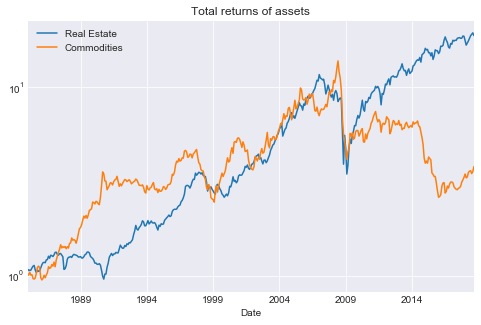

In [368]:
fs = ["Real Estate","Commodities"]
erk.compound_returns(factors_assets[fs], start=1).plot(grid=True, figsize=(8,5), logy=True, title="Total returns of assets")
plt.show()

In [369]:
# choose Real Estate as the dependent variable and using the 5 factors as explanatory variables
factors = factors_assets[factor_names].values
assets  = factors_assets[asset_names].values
y = factors_assets["Real Estate"].values

In [371]:
# Linear Regression (OLS) using analytical formula
factors_ones = np.concatenate( (factors, np.ones((factors.shape[0],1))), axis=1 )
betas = np.linalg.inv( factors_ones.T.dot(factors_ones) ).dot( factors_ones.T ).dot( y )
betas = mla.display_betas(betas, factor_names) 
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.310261,1.212508,1.054238,0.287919,0.36184,-0.003587


In [372]:
# Linear Regression (OLS) using statsmodels OLS method implemented in our kit
lm = erk.linear_regression(y, factors)
betas = mla.display_betas(lm.params, factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.310261,1.212508,1.054238,0.287919,0.36184,-0.003587


Right, they coincide. We can also use the method **linear_regression_sk** which uses **scikit-learn** library:

In [373]:
lm = mla.linear_regression_sk(y, factors)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.310261,1.212508,1.054238,0.287919,0.36184,-0.003587


### OLS Drawbacks 

OLS has major drawbacks. First, OLS has **no mechanism to filter out noise variables**. Second, it assumes that **factor loadings are constant over time**. In practice, you will generally have many variables that you would like to filter down.  Moreover, the assumption that the factor loadings are constant over time is restrictive, and not true.  In fact, we will show that factor loadings are highly dependent on the time period.

To demonstrate how OLS can be susceptible to noise, we introduce **a noise variable positively correlated with the World Equities factor**. 
Then we re-run the OLS regression and we will see that the regression chosses to average the two signals, 
changing the loading on the World Equity factor:

In [374]:
factors_plus_noise = factors_assets[factor_names].copy()
factors_plus_noise_names = factor_names + ["Noise"]

In [375]:
ndata = factors_assets.shape[0]
noise = np.random.normal(loc=0, scale=2*factors_assets["World Equities"].std(), size=ndata)
noise = np.reshape( noise + factors_assets["World Equities"].values, (ndata,1) )

In [376]:
factors_plus_noise["Noise"] = noise

In [377]:
lm = mla.linear_regression_sk(y, factors_plus_noise)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factors_plus_noise_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise,alpha
beta,0.308896,1.212651,1.054312,0.28735,0.361935,0.001284,-0.003585


To demonstrate on the drawback of the OLS regression we show that **the OLS estimator depends greatly on the time period**. 
We pick different time periods and run the OLS regression and see that the factor loadings can change dramatically 
depending on the time period. 

We filter the data into two different regimes: a first **normal regime** will be months where US Equities had a positive monthly return and a second **crash regime** being the months where US Equities had a negative return. 
These are crude approximations, but even with this crude definition we will return substantially different factor loadings:

In [378]:
# filtering data for positive US Equities - normal regime 
normal_data = factors_assets[factors_assets["US Equities"] > 0].copy()
normal_factors = normal_data[factor_names]
normal_y = normal_data[asset_names]["Real Estate"]

lm = mla.linear_regression_sk(normal_y, normal_factors)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.15022,1.30286,1.100558,0.210193,0.05183,0.00348


In [379]:
# filtering data for negative US Equities - crash regime 
crash_data = factors_assets[factors_assets["US Equities"] <= 0].copy()
crash_factors = crash_data[factor_names]
crash_y = crash_data[asset_names]["Real Estate"]

lm = mla.linear_regression_sk(crash_y, crash_factors)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.365824,0.959781,0.792532,0.540801,0.588727,-0.011274


Even with a crude definition of a **crash regime** we have isolated different factor loadings. 
Notice that during normal periods the loading on Currency Protection is close to zero, but during crash periods is **10x** larger.

#### Lasso Regression 

For penalty methods, $\lambda$ is an hyperparameter that we need to choose. Now, **scikit-learn does not use $\lambda$**. It rather 
uses the parameter $\alpha$ which can be related to $\lambda$ via the following equation:
$$
\alpha = \frac{\lambda}{2 n},
$$
where $n$ is the number of data points.

In [380]:
# for now let's arbitrarily pick lambda = 0.1
lambdapar = 0.1
lm = mla.lasso_regression_sk(y, factors, lambdapar=lambdapar)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.349738,0.5422,0.574002,0.0,0.0,0.001834


Let us show how the Lasso regression filters out the noise variable:

In [381]:
lm = mla.lasso_regression_sk(y, factors_plus_noise, lambdapar=lambdapar)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factors_plus_noise_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise,alpha
beta,0.346528,0.542612,0.574044,0.0,0.0,0.00302,0.001838


In [382]:
# another try with lambda = 0.2
lm = mla.lasso_regression_sk(y, factors_plus_noise, lambdapar=0.2)
betas = mla.display_betas( np.append(lm.coef_, lm.intercept_), factors_plus_noise_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise,alpha
beta,0.405948,0.0,0.12743,0.0,0.0,0.002316,0.005355


### Cross Validation
In the experiments above with Lasso regression we had indeed another problem, the choice of $\lambda$. 
In practice, most people use **cross-validation** to find out an optimal value. 
We will not give a formal definition of cross-validation here, and instead we will give a heuristic.

In **cross-validation**, we first break the training set into $K$ folds, and define a list of $\lambda$ values. 
For each fold, and for each $\lambda$, we train the model $k-1$ other folds, and calculate the error on the test fold. At the end of this, you will have $K$ out of sample errors for each value of lambda. Then we pick the $\lambda$ which produces the average error across 
the out of sample tests.

Here we use cross validation to pick the optimal lambda value for Lasso regression:

#### Lasso Regression 

In [389]:
gsCV = mla.cross_val_lasso_regression(y, factors, lambda_max=0.25, n_lambdas=100, n_folds=10, rs=7777)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [390]:
best_lambda = mla.recover_regression_bestpar_from_gsCV(gsCV, factors, "lasso")

best lambda: 0.048634343434343426


In [391]:
# Regression using the best estimator
betas = np.append(gsCV.best_estimator_.coef_, gsCV.best_estimator_.intercept_)
betas = mla.display_betas(betas, factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.311805,0.875641,0.835079,0.044825,0.0,-0.000342


Let us run the cross-validation Lasso regression in the case of noise:

In [392]:
gsCV = mla.cross_val_lasso_regression(y, factors_plus_noise, lambda_max=0.25, n_lambdas=100, n_folds=10, rs=7777)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [394]:
best_lambda = mla.recover_regression_bestpar_from_gsCV(gsCV, factors_plus_noise, "lasso")

best lambda: 0.048634343434343426


In [395]:
# Regression using the best estimator
betas = np.append(gsCV.best_estimator_.coef_, gsCV.best_estimator_.intercept_)
betas = mla.display_betas(betas, factors_plus_noise_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise,alpha
beta,0.30852,0.875974,0.83526,0.043452,0.0,0.003075,-0.000336


#### Elastic Net regression 

We recall that the **Elastic Net regression** was: 
$$
\text{minimize} \;\; \frac{1}{2N} \bigl( ||\mathbf{y} - X\mathbf{\beta} ||_2^2 + \lambda_1||\beta||_1 + \lambda_2||\beta||^2_2  \bigr).
$$
However, the **ElasticNet** method implemented in scikit-learn defines the parameters $\lambda_1$ and $\lambda_2$ as:
$$
\lambda_1 := \alpha L^1_{ratio}
\quad\text{and}\quad
\lambda_2 := \frac{1}{2}\alpha \left(1-L^1_{ratio}\right),
$$
where $L^1_{ratio} \in [0,1]$ for which if $L^1_{ratio}=1$ we are doing Lasso regression (hence, $\alpha$ here is defined as the parameter in the Lasso regression) and when $L^1_{ratio}=0$ we do a Ridge Regression.

In [396]:
gsCV = mla.cross_val_elasticnet_regression(y, factors, lambda_max=0.25, n_lambdas=50, l1_ratio_max=0.99, n_l1ratio=50, n_folds=10, rs=7777)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [397]:
best_lambda1, best_lambda2 = mla.recover_regression_bestpar_from_gsCV(gsCV, factors, "elasticnet")

best lambda1: 0.04611379591836734
best lambda2: 0.00023289795918367363


In [398]:
# Regression using the best estimator
betas = np.append(gsCV.best_estimator_.coef_, gsCV.best_estimator_.intercept_)
betas = mla.display_betas(betas, factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.310548,0.889796,0.844634,0.056504,0.0,-0.000444


In [399]:
# The case with noise 
gsCV = mla.cross_val_elasticnet_regression(y, factors_plus_noise, lambda_max=0.25, n_lambdas=50, l1_ratio_max=0.99, n_l1ratio=50, n_folds=10, rs=7777)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [402]:
best_lambda1, best_lambda2 = mla.recover_regression_bestpar_from_gsCV(gsCV, factors_plus_noise, "elasticnet")

best lambda1: 0.04611379591836734
best lambda2: 0.00023289795918367363


In [403]:
# Regression using the best estimator
betas = np.append(gsCV.best_estimator_.coef_, gsCV.best_estimator_.intercept_)
betas = mla.display_betas(betas, factors_plus_noise_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise,alpha
beta,0.307373,0.890116,0.844807,0.055179,0.0,0.002974,-0.000439


#### Using Best Subset Regression 

In [405]:
# using max_vars = 2
betas, alpha = mla.best_subset_regression(y, factors, max_vars=2)

# Regression using the best estimator
betas = np.append(betas, alpha)
betas = mla.display_betas(betas, factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.0,1.453734,1.395798,0.0,0.0,-0.001956


In [407]:
# using max_vars = 3
betas, alpha = mla.best_subset_regression(y, factors, max_vars=3)

# Regression using the best estimator
betas = np.append(betas, alpha)
betas = mla.display_betas(betas, factor_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,alpha
beta,0.274697,1.186262,1.091385,0.0,0.0,-0.002295


In [408]:
# using max_vars = 3 and noisy data
betas, alpha = mla.best_subset_regression(y, factors_plus_noise, max_vars=3)

# Regression using the best estimator
betas = np.append(betas, alpha)
betas = mla.display_betas(betas, factors_plus_noise_names)
betas

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise,alpha
beta,0.274692,1.186272,1.091393,0.0,0.0,0.0,-0.002295
